In [1]:
from sklearn.datasets import load_diabetes # (1)
import numpy as np # (2,3)
from sklearn.model_selection import train_test_split # (4)

    (1) Loading Data

* Import the data from load_diabetes in sklearn.datasets.

* Save the data from diabetes.data into df_X and the target from diabetes.target into df_y.

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df_x = diabetes.data
df_y = diabetes.target

print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

    (2) Preparing Input Data for the Model
    
* Convert the values in df_X to a numpy array and store it.

In [4]:
df_x = np.array(df_x)

    (3) Preparing Target Data for the Model

* Convert the values in df_y to a numpy array and store it.

In [5]:
df_y = np.array(df_y)

    (4) Splitting the Data into Train and Test Sets

* Split the X and y data into separate train and test sets.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.2, random_state=42)

(5) Preparing the Model

* Prepare the weight W and bias b according to the number of input features.
* Implement the model function.

In [7]:
W = np.random.rand(10)
b = np.random.rand()

print(W)
print(b)

[0.33380753 0.06304176 0.38928935 0.0042788  0.44225957 0.16913545
 0.56141312 0.04287637 0.77428197 0.35476169]
0.8180992042067827


In [8]:
def model(X,W,b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

(6) Defining the Loss Function

* Define the loss function using the Mean Squared Error (MSE) function.

In [9]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = MSE(predictions, y)
    return L

    (7) Implementing the Gradient Function

* Implement the gradient function to compute the gradients.

In [10]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db



In [11]:
dW,db=gradient(df_x,W,b,df_y)
print(dW)
print(db)

[-1.37253168 -0.31460594 -4.29197805 -3.2305901  -1.5470876  -1.27043741
  2.89170282 -3.1494379  -4.13954065 -2.79721276]
-302.6307699173783


    (8) Setting the Learning Rate as a Hyperparameter

* Set the learning rate as a hyperparameter.

* If the model is not learning well, experiment with different learning rate values.

In [12]:
LEARNING_RATE = 0.1

    (9) Training the Model

* Train the model using the defined loss function and gradient function.
* Train the model until the loss value is sufficiently low.
* It is acceptable to exclude some feature columns from the input data X. Experiment with various data configurations.

In [13]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 10 : Loss 6257.5316
Iteration 20 : Loss 5914.9101
Iteration 30 : Loss 5838.0966
Iteration 40 : Loss 5766.6068
Iteration 50 : Loss 5697.3612
Iteration 60 : Loss 5630.2500
Iteration 70 : Loss 5565.2007
Iteration 80 : Loss 5502.1435
Iteration 90 : Loss 5441.0110
Iteration 100 : Loss 5381.7382
Iteration 110 : Loss 5324.2624
Iteration 120 : Loss 5268.5230
Iteration 130 : Loss 5214.4616
Iteration 140 : Loss 5162.0219
Iteration 150 : Loss 5111.1495
Iteration 160 : Loss 5061.7917
Iteration 170 : Loss 5013.8978
Iteration 180 : Loss 4967.4191
Iteration 190 : Loss 4922.3082
Iteration 200 : Loss 4878.5195
Iteration 210 : Loss 4836.0090
Iteration 220 : Loss 4794.7342
Iteration 230 : Loss 4754.6543
Iteration 240 : Loss 4715.7295
Iteration 250 : Loss 4677.9216
Iteration 260 : Loss 4641.1938
Iteration 270 : Loss 4605.5105
Iteration 280 : Loss 4570.8373
Iteration 290 : Loss 4537.1411
Iteration 300 : Loss 4504.3897
Iteration 310 : Loss 4472.5523
Iteration 320 : Loss 4441.5990
Iteration 330 : L

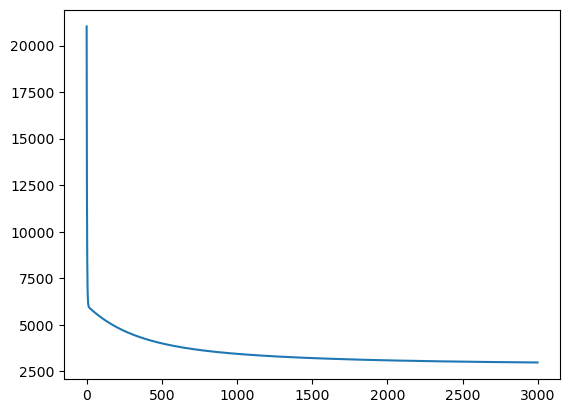

In [14]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

    (10) Evaluating Performance on Test Data

* Evaluate the performance of the model on the test data.

In [15]:
predictions = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2870.1170835775138

    (11) Visualizing the Ground Truth and Predicted Data

* Create a plot with the first column of the X data on the x-axis and the target data on the y-axis to visualize the predicted data by the model.


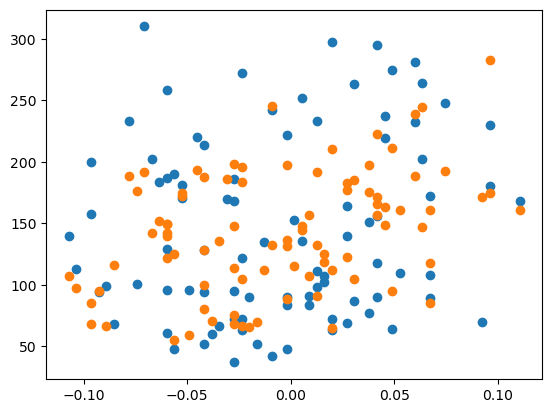

In [16]:
plt.scatter(X_test[:,0],y_test)
plt.scatter(X_test[:,0],predictions)
plt.show()